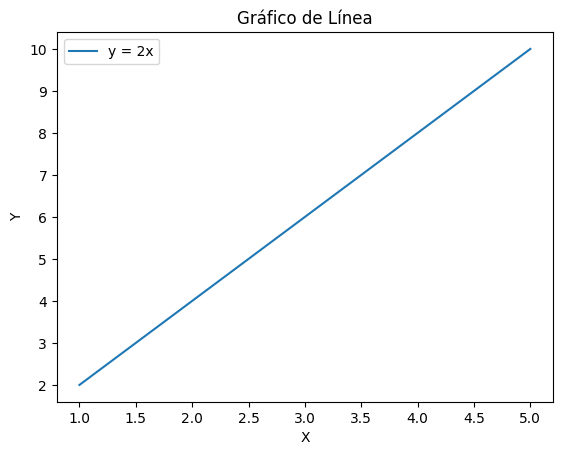

In [11]:
import matplotlib.pyplot as plt
#Datos
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

#Crear grafico
plt.plot(x, y, label="y = 2x")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gráfico de Línea")
plt.legend()
plt.show()

In [13]:
import pandas as pd

# Crear un DataFrame
data = {
    "Nombre": ["Ana", "Luis", "Carlos"],
    "Edad": [25, 30, 35],
    "Ciudad": ["Madrid", "Barcelona", "Valencia"]
}
df = pd.DataFrame(data)

# Mostrar información
print(df)
print("\nPromedio de edad:", df["Edad"].mean())

   Nombre  Edad     Ciudad
0     Ana    25     Madrid
1    Luis    30  Barcelona
2  Carlos    35   Valencia

Promedio de edad: 30.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Datos más grandes
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción
pred = model.predict(X_test)
print("Predicciones:", pred)

Predicciones: [ 4. 10.]


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluar el modelo
mse = mean_squared_error(y_test, pred)  # Error Cuadrático Medio
r2 = r2_score(y_test, pred)             # Coeficiente de Determinación (R²)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")

Error Cuadrático Medio (MSE): 0.0
Coeficiente de Determinación (R²): 1.0


In [21]:
# Nuevos datos para predicción
X_new = np.array([[11], [12], [13]])

# Hacer predicciones
y_new_pred = model.predict(X_new)

# Mostrar resultados
print("Nuevas predicciones:", y_new_pred)

Nuevas predicciones: [22. 24. 26.]


In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Cargar dataset de ejemplo
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocesar datos
x_train = x_train / 255.0
x_test = x_test / 255.0

# Modelo
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilar y entrenar
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

# Evaluar
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Precisión en el conjunto de prueba:", test_acc)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step


c:\Users\victo\source\repos\Learning jupyter notebooks\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8810 - loss: 0.4303
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9635 - loss: 0.1229
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9758 - loss: 0.0792
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9826 - loss: 0.0557
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9861 - loss: 0.0460
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.9747 - loss: 0.0842
Precisión en el conjunto de prueba: 0.9771999716758728


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


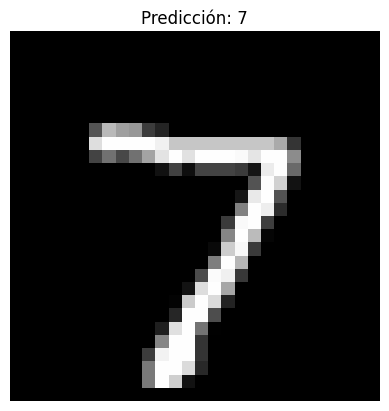

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


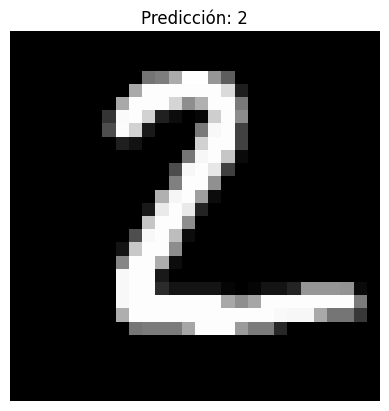

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


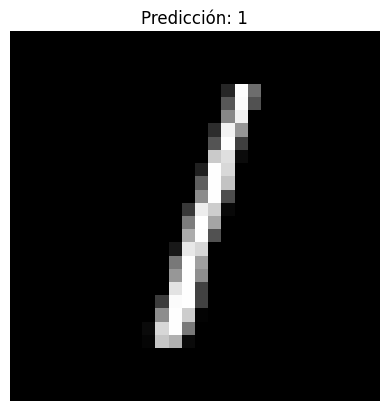

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


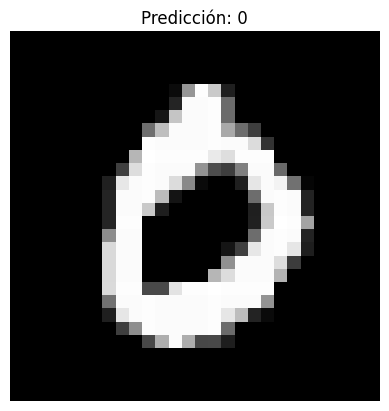

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


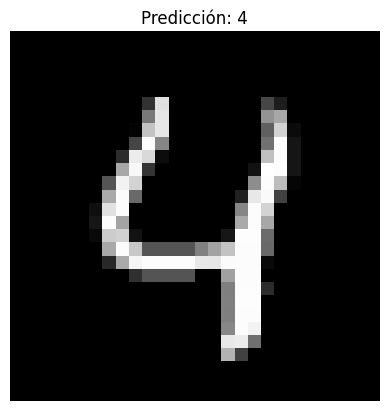

In [24]:
# Probar con las primeras 5 imágenes del conjunto de prueba
for i in range(5):
    sample_image = x_test[i]
    sample_image_reshaped = sample_image.reshape(1, 28, 28)
    predicted_probabilities = model.predict(sample_image_reshaped)
    predicted_label = np.argmax(predicted_probabilities)
    
    plt.imshow(sample_image, cmap='gray')
    plt.title(f"Predicción: {predicted_label}")
    plt.axis('off')
    plt.show()

In [1]:
from transformers import pipeline

# Cargar pipeline de análisis de sentimientos
sentiment_pipeline = pipeline("sentiment-analysis", framework="pt")

# Texto de ejemplo
textos = ["¡Me encanta este producto!", "Es terrible, no lo recomiendo."]

# Análisis
resultados = sentiment_pipeline(textos)
for texto, resultado in zip(textos, resultados):
    print(f"Texto: {texto} -> Sentimiento: {resultado['label']}, Confianza: {resultado['score']:.2f}")

c:\Users\victo\source\repos\Learning jupyter notebooks\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Texto: ¡Me encanta este producto! -> Sentimiento: POSITIVE, Confianza: 1.00
Texto: Es terrible, no lo recomiendo. -> Sentimiento: NEGATIVE, Confianza: 1.00
